In [15]:
!pip install pandas
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')


In [36]:
data.describe()


,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


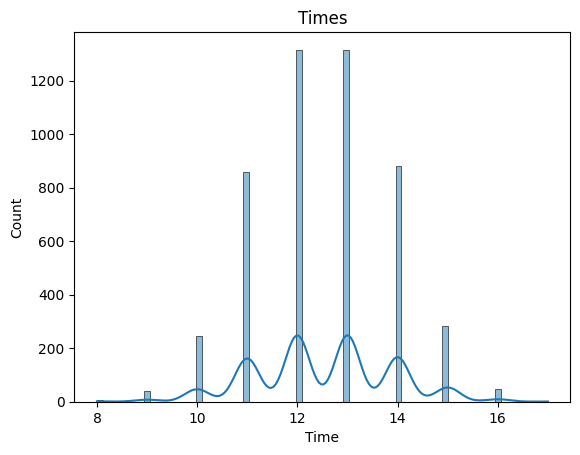

In [40]:
sns.histplot(data['Time'], kde=True)
plt.xlabel('Time')
plt.title('Times')
plt.show()


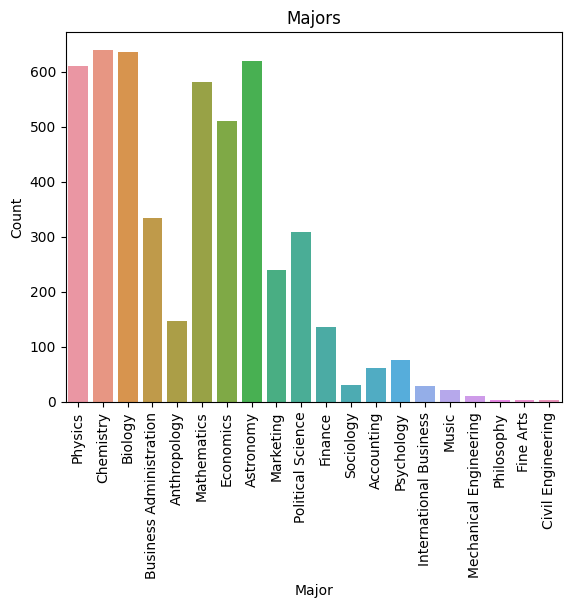

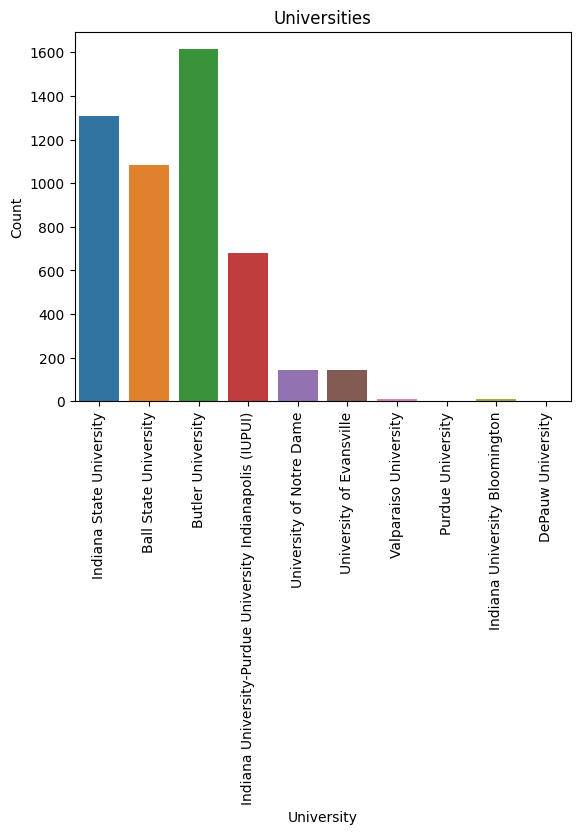

In [41]:
sns.countplot(x='Major', data=data)
plt.xticks(rotation=90)
plt.xlabel('Major')
plt.ylabel('Count')
plt.title('Majors')
plt.show()

sns.countplot(x='University', data=data)
plt.xticks(rotation=90)
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Universities')
plt.show()


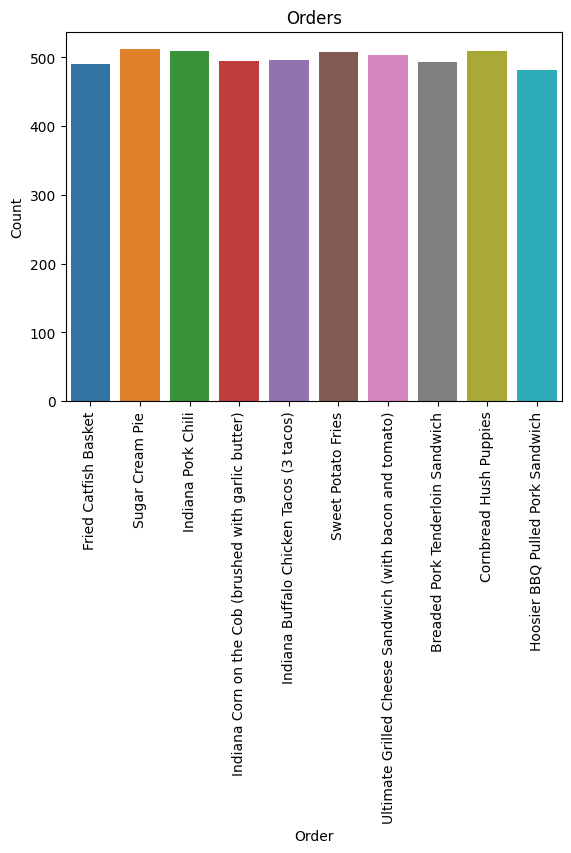

In [42]:
sns.countplot(x='Order', data=data)
plt.xticks(rotation=90)
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Orders')
plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
data['Year'] = data['Year'].str.split(' ').str[1].astype(int)
data['Major_encoded'] = label_encoder.fit_transform(data['Major'])
data['University_encoded'] = label_encoder.fit_transform(data['University'])

X = data[['Year', 'Major_encoded', 'University_encoded', 'Time']]
y = data['Order']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = RandomForestClassifier() #Used this Classifier

cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=5)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.654296875
